<a href="https://colab.research.google.com/github/itimes-digital/maratona_ibm/blob/master/analise_algar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [28]:
dataset = pd.read_csv('sample_data/algar-dataset-treino.csv')
dataset.head()

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,Genero,Horas voluntariado,Envolvimento com trabalho,Posicao,Cargo,Satisfação com emprego,Estado civil,Renda,Bonus de performance,Quantidade de empresas que trabalho,Maior de idade,Necessita de hora extra,Aumento de salario%,Performance na entrevista,Satisfação com a relação,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,Contratar
0,49,Cliente,279,Engenharia,8,Médio completo,Ciências das natureza,1,2,3,M,61,2,2,Engenheiro,2,Casado,5130,24907,1,1,Não,23,4,4,80,1,10,3,3,10,7,1,7,Não
1,33,Misto,1392,Engenharia,3,Superior incompleto - cursando,Ciências das natureza,1,5,4,F,56,3,1,Engenheiro,3,Casado,2909,23159,1,1,Sim,11,3,3,80,0,8,3,3,8,7,3,0,Não
2,27,Cliente,591,Engenharia,2,Médio completo,Medicina,1,7,1,M,40,3,1,Tecnico,2,Casado,3468,16632,9,1,Não,12,3,4,80,1,6,3,3,2,2,2,2,Não
3,32,Misto,1005,Engenharia,2,Superior incompleto,Ciências das natureza,1,8,4,M,79,3,1,Tecnico,4,Solteiro,3068,11864,0,1,Não,13,3,3,80,0,8,2,2,7,7,3,6,Não
4,59,Misto,1324,Engenharia,3,Superior completo,Medicina,1,10,3,F,81,4,1,Tecnico,1,Casado,2670,9964,4,1,Sim,20,4,1,80,3,12,3,2,1,0,0,0,Não


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Idade                                       1370 non-null   int64 
 1   Local de trabalho                           1370 non-null   object
 2   Pontuação teste                             1370 non-null   int64 
 3   Departmento                                 1370 non-null   object
 4   Distancia casa-trabalho                     1370 non-null   int64 
 5   Educacao                                    1370 non-null   object
 6   Area                                        1370 non-null   object
 7   Possui carro                                1370 non-null   int64 
 8   Subordinado                                 1370 non-null   int64 
 9   Satisfação com o ambiente no emprego atual  1370 non-null   int64 
 10  Genero                  

In [5]:
dataset.describe()

,Idade,Pontuação teste,Distancia casa-trabalho,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,Horas voluntariado,Envolvimento com trabalho,Posicao,Satisfação com emprego,Renda,Bonus de performance,Quantidade de empresas que trabalho,Maior de idade,Aumento de salario%,Performance na entrevista,Satisfação com a relação,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência
count,1370.000000,1370.000000,1370.000000,1370.0,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.0,1370.000000,1370.000000,1370.000000,1370.0,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000
mean,37.030657,807.249635,9.105109,1.0,1012.276642,2.729927,65.807299,2.745985,2.081752,2.723358,6572.754745,14296.439416,2.703650,1.0,15.174453,3.150365,2.720438,80.0,0.804380,11.357664,2.800730,2.769343,7.031387,4.244526,2.206569,4.141606
std,9.196528,404.400662,7.992457,0.0,569.946647,1.091863,20.389902,0.706643,1.113974,1.107829,4755.773452,7122.797449,2.499333,0.0,3.629208,0.357559,1.079704,0.0,0.851919,7.849234,1.282745,0.704319,6.127907,3.617897,3.220930,3.578049
min,18.000000,102.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,1.0,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.250000,2.000000,1.0,516.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2932.250000,8009.750000,1.000000,1.0,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,806.000000,7.000000,1.0,1014.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4955.000000,14225.500000,2.000000,1.0,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1168.750000,14.000000,1.0,1512.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8437.500000,20456.250000,4.000000,1.0,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,1.0,2055.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,1.0,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [6]:
dataset['Local de trabalho'].unique()

array(['Cliente', 'Misto', 'Escritório'], dtype=object)

In [7]:
dataset['Area'].unique()

array(['Ciências das natureza', 'Medicina', 'Outros', 'Marketing',
       'Faculdade Técnica', 'Ciências humanas'], dtype=object)

In [8]:
dataset['Contratar'].unique()

array(['Não', 'Sim'], dtype=object)

In [10]:
dataset['Educacao'].unique()

array(['Médio completo', 'Superior incompleto - cursando',
       'Superior incompleto', 'Superior completo', 'Pós-gradução'],
      dtype=object)

In [40]:
dataset['Horas de trabalho padrão'].unique()

array([80])

In [29]:
dataset_novo = dataset

In [41]:
dataset_novo['Necessita de hora extra'] = dataset_novo['Necessita de hora extra'].astype('category')
dataset_novo['Contratar'] = dataset_novo['Contratar'].astype('category')
dataset_novo['Area'] = dataset_novo['Area'].astype('category')
dataset_novo['Local de trabalho'] = dataset_novo['Local de trabalho'].astype('category')
dataset_novo['Genero'] = dataset_novo['Genero'].astype('category')
dataset_novo['Educacao'] = dataset_novo['Educacao'].astype('category')
dataset_novo['Departmento'] = dataset_novo['Departmento'].astype('category')
dataset_novo['Cargo'] = dataset_novo['Cargo'].astype('category')
dataset_novo['Estado civil'] = dataset_novo['Estado civil'].astype('category')
dataset_novo['Possui carro'] = dataset_novo['Possui carro'].astype('category')
dataset_novo['Maior de idade'] = dataset_novo['Maior de idade'].astype('category')
dataset_novo['Horas de trabalho padrão'] = dataset_novo['Horas de trabalho padrão'].astype('category')

In [42]:
dataset_novo['Possui carro'].isnull().sum()

0

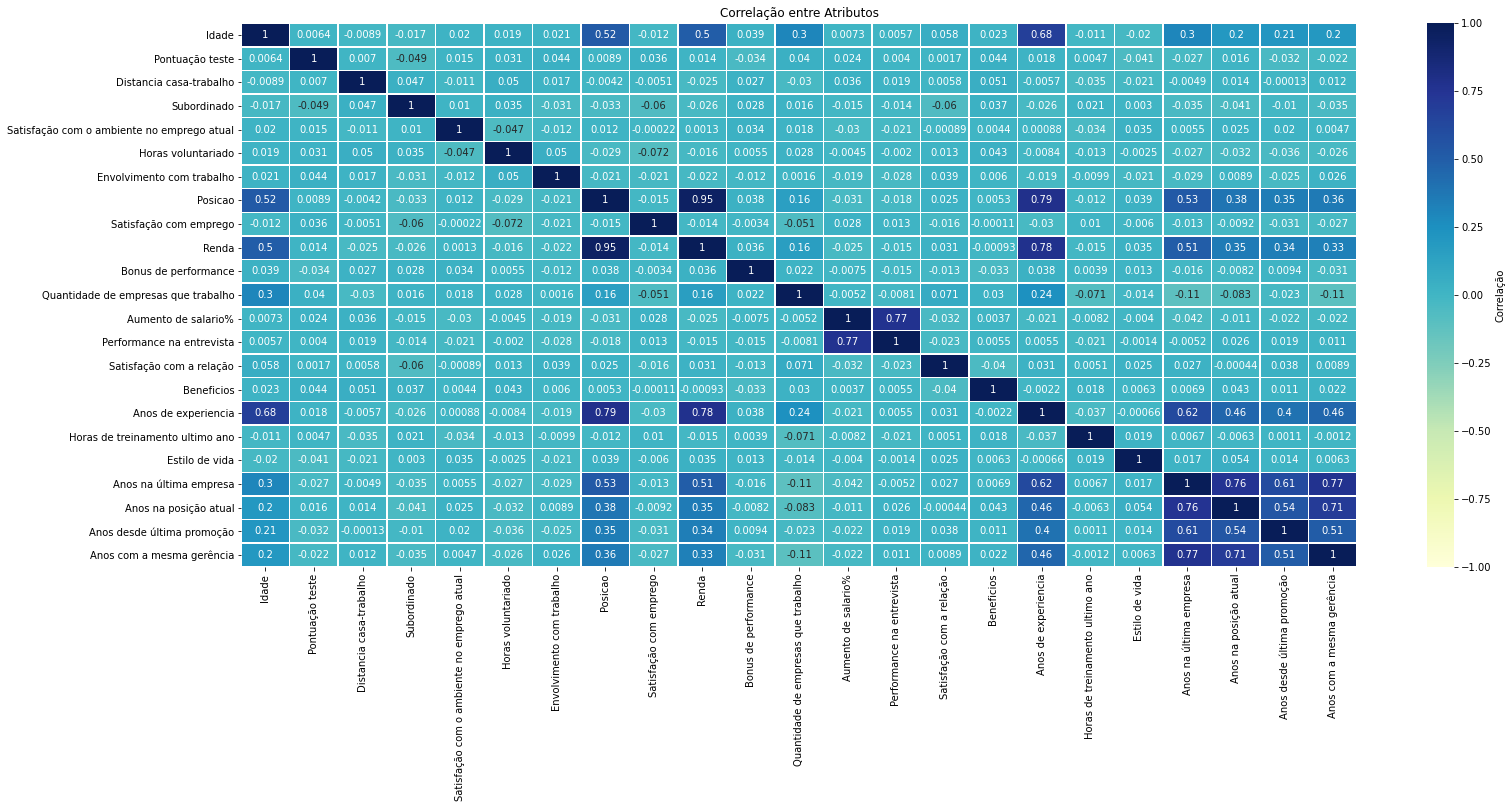

In [45]:
f, ax = plt.subplots(figsize=(25, 10))
plt.title("Correlação entre Atributos")
heat_map = sns.heatmap(dataset_novo.corr(), 
            annot=True, 
            vmin = -1,
            vmax = 1,
            linewidths=.5, 
            cmap="YlGnBu", 
            center=0, 
            ax=ax, 
            cbar_kws={'label': 'Correlação'})

heat_map.set_xticklabels(heat_map.get_xticklabels(), 
                         rotation=90, 
                         horizontalalignment='center')
plt.show()
#Renda, posição, idade, anos de experiência, anos da ultima empresa, anos na posição atual, anos na mesma gerencia, anos desde a ultima posicao

In [ ]:
previsores = base.iloc[:, 0:14].values

classe = base.iloc[:, 14].values

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
labelEncoder_previsores = LabelEncoder()

In [ ]:
previsores[:, 1] = labelEncoder_previsores.fit_transform(previsores[:,1])
previsores[:, 3] = labelEncoder_previsores.fit_transform(previsores[:,3])
previsores[:, 5] = labelEncoder_previsores.fit_transform(previsores[:,5])
previsores[:, 6] = labelEncoder_previsores.fit_transform(previsores[:,6])
previsores[:, 7] = labelEncoder_previsores.fit_transform(previsores[:,7])
previsores[:, 8] = labelEncoder_previsores.fit_transform(previsores[:,8])
previsores[:, 9] = labelEncoder_previsores.fit_transform(previsores[:,9])
previsores[:, 13] = labelEncoder_previsores.fit_transform(previsores[:,13])

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
column_transform = ColumnTransformer([("encoder", 
                         OneHotEncoder(), 
                        [1,3,5,6,7,8,9,13])],    
                       remainder = 'passthrough')

In [ ]:
labelEncoder_classe = LabelEncoder()
classe = labelEncoder_classe.fit_transform(classe)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

previsores = scaler.fit_transform(previsores)

In [ ]:
from sklearn.model_selection import train_test_split

previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, 
                                classe, 
                                test_size=0.30,
                                random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
import collections 

In [ ]:
classificador = LogisticRegression()
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)
previsoes

In [ ]:
precisao = accuracy_score(classe_teste, previsoes)
precisao

In [ ]:
matriz = confusion_matrix(classe_teste, previsoes)
matriz

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=matriz)
plt.show()

In [ ]:
print(collections.Counter(classe_teste))